# 3rd Meeting - Information Retrieval
#### BRI Institute
## Pre-requisites

Please have the following pre-requisites ready on your machine. If you don't have them, please install them with the hurry of this hacker cat!

![Typing cat gif](https://media.giphy.com/media/o0vwzuFwCGAFO/giphy.gif)

### Installing Jupyter on your machine

- If you already have Anaconda, you should have Jupyter installed as well. ```jupyter notebook``` opens up a Jupyter notebook in your browser at default port 8888. 

- Use pip install. ```python3 -m pip install jupyter``` for Python 3 install, ```python -m pip install jupyter``` for Python 2 install. For more details, refer to https://jupyter.org/install

- Also use pip to install the following packages: ```nltk, lxml, requests, matplotlib, re, sklearn, wikipedia, random, gensim, wordcloud```

## NLTK
Natural Language Toolkit is the most popular collection of libraries and programs to do NLP. You can find more about it here: http://www.nltk.org/book/ch00.html. We will mainly be using NLTK to perform different tasks, along with a few other packages.

In [19]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\KJRI
[nltk_data]     Shanghai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to C:\Users\KJRI
[nltk_data]     Shanghai\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KJRI
[nltk_data]     Shanghai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

NLTK comes pre-loaded with texts from the Project Gutenberg archive that you can use. It also has a collection of informal text from discussion forums, conversations, chat sessions, movie scripts, etc. NLTK has corpora in other languages as well.

In [2]:
from nltk.corpus import gutenberg

# Printing the first 100 characters of each of the files
for fileid in gutenberg.fileids():
    print(fileid, gutenberg.raw(fileid)[:100], '...')


austen-emma.txt [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a ...
austen-persuasion.txt [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire ...
austen-sense.txt [Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle ...
bible-kjv.txt [The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called  ...
blake-poems.txt [Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS  ...
bryant-stories.txt [Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     T ...
burgess-busterbrown.txt [The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Bu ...
carroll-alice.txt [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was ...
chesterton-ball.txt [The Ba

## Getting the data
![Fetch data](https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif)

Data can come from a variety of sources in different formats. Natural language can be in the form of text or speech. For the purpose of this tutorial, we will be focusing on text-based processing as opposed to speech recognition and synthesis. <br>

Textual data used for this class taken from: https://bri-institute.ac.id/en/home/

In [10]:
sample_data = ["Bank Rakyat Indonesia Institute of Technology and Business or BRI Institute is a private tertiary institution located on Jl. RM. Harsono No.2, Ragunan, Pasar Minggu, Kota Jakarta Selatan. BRI institute was established on November 14, 2018 based on the Decree of the Minister of Research, Technology and Higher Education Republic of Indonesia No. 1014 / KPT / I / 2018. BRI Institute is expected to produce graduates who are superior and ready to use in the financial industry business that is cultivated and controlled by the BRI Group, among others related to microfinance, insurance, sharia, digital banking and entrepreneurship. Later graduates are expected to meet the BRI Group’s internal needs and be absorbed by the financial industry in Indonesia."]
sample_data

['Bank Rakyat Indonesia Institute of Technology and Business or BRI Institute is a private tertiary institution located on Jl. RM. Harsono No.2, Ragunan, Pasar Minggu, Kota Jakarta Selatan. BRI institute was established on November 14, 2018 based on the Decree of the Minister of Research, Technology and Higher Education Republic of Indonesia No. 1014 / KPT / I / 2018. BRI Institute is expected to produce graduates who are superior and ready to use in the financial industry business that is cultivated and controlled by the BRI Group, among others related to microfinance, insurance, sharia, digital banking and entrepreneurship. Later graduates are expected to meet the BRI Group’s internal needs and be absorbed by the financial industry in Indonesia.']

## Sentence segmentation
A paragraph is nothing but a collection of sentences. Also called sentence tokenization or sentence boundary disambiguation, this process breaks up sentences by deciding where a sentence starts and ends. Challenges include recognizing ambiguous puncutation marks. For example, `.` can be used for a decimal point, an ellipsis or a period. Let's use ```sent_tokenize``` from ```nltk.tokenize``` to get sentences.

In [11]:
from nltk.tokenize import sent_tokenize

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print('Sentence tokens:', sentences)
    return sentences

In [12]:
sample_sentences = get_sent_tokens(sample_data)

Sentence tokens: ['Bank Rakyat Indonesia Institute of Technology and Business or BRI Institute is a private tertiary institution located on Jl.', 'RM.', 'Harsono No.2, Ragunan, Pasar Minggu, Kota Jakarta Selatan.', 'BRI institute was established on November 14, 2018 based on the Decree of the Minister of Research, Technology and Higher Education Republic of Indonesia No.', '1014 / KPT / I / 2018.', 'BRI Institute is expected to produce graduates who are superior and ready to use in the financial industry business that is cultivated and controlled by the BRI Group, among others related to microfinance, insurance, sharia, digital banking and entrepreneurship.', 'Later graduates are expected to meet the BRI Group’s internal needs and be absorbed by the financial industry in Indonesia.']


## Word tokenization
A sentence is a collection of words. Word tokenization is similar to sentence tokenization, but works on words. Let's use ```word_tokenize``` from ```nltk.tokenize``` to get the words. 

In [13]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print('Word tokens:', words)
    return(words)

In [14]:
sample_words = get_word_tokens(sample_sentences)

Word tokens: ['Bank', 'Rakyat', 'Indonesia', 'Institute', 'of', 'Technology', 'and', 'Business', 'or', 'BRI', 'Institute', 'is', 'a', 'private', 'tertiary', 'institution', 'located', 'on', 'Jl', '.', 'RM', '.', 'Harsono', 'No.2', ',', 'Ragunan', ',', 'Pasar', 'Minggu', ',', 'Kota', 'Jakarta', 'Selatan', '.', 'BRI', 'institute', 'was', 'established', 'on', 'November', '14', ',', '2018', 'based', 'on', 'the', 'Decree', 'of', 'the', 'Minister', 'of', 'Research', ',', 'Technology', 'and', 'Higher', 'Education', 'Republic', 'of', 'Indonesia', 'No', '.', '1014', '/', 'KPT', '/', 'I', '/', '2018', '.', 'BRI', 'Institute', 'is', 'expected', 'to', 'produce', 'graduates', 'who', 'are', 'superior', 'and', 'ready', 'to', 'use', 'in', 'the', 'financial', 'industry', 'business', 'that', 'is', 'cultivated', 'and', 'controlled', 'by', 'the', 'BRI', 'Group', ',', 'among', 'others', 'related', 'to', 'microfinance', ',', 'insurance', ',', 'sharia', ',', 'digital', 'banking', 'and', 'entrepreneurship', '.

## Frequency distribution
Calculates the frequency distribution for each word in the data. Use ```nltk.probability``` from ```FreqDist``` and ```matplotlib```.

In [15]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    '''Frequency distribution'''
    fdist = FreqDist(words)
    fdist.plot(num_words, cumulative=False)

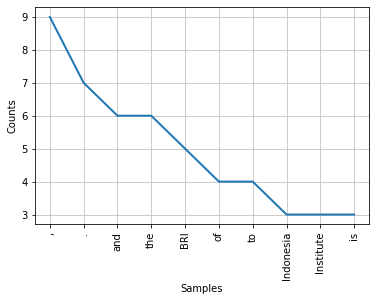

In [16]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

## Cleaning the data
![Cleaning data](https://media.giphy.com/media/10zsjaH4g0GgmY/giphy.gif)

Oops, we missed a crucial step! Real world data is often messy and needs to undergo cleaning. You can do a bunch of preprocessing to ensure the data is clean, like:
- Removing special characters and numbers - These are usually not important when trying to derive the semantics
- Removing stopwords - A special category of words that don't have any significance on their own and are often used as filler words or to ensure correct grammer. Eg. the, and, but, of, is, or, those, her, 
- Removing HTML tags - Raw data from webpages can often be laden with HTML tags. Use a library like `BeautifulSoup` to process and remove the tags.
- Standardizing words - This aims to consolidate different versions of the same version Eg. SMS/Twitter language, slang, misspellings 
- Converting to lower case - To ensure uniformity across all words


In [20]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_clean_sentences(sentences, remove_digits=False):
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent)
        clean_text = clean_text.lower()
        clean_sentences.append(clean_text)
    print('Clean sentences:', clean_sentences)
    return clean_sentences

def filter_stopwords(words):
    '''Removing stopwords from given words'''
    filtered_words = [w for w in words if w not in stop_words]
    print('Filtered words:', filtered_words)
    return filtered_words

In [21]:
sample_sentences = get_clean_sentences(sample_sentences, remove_digits = True)
sample_words = get_word_tokens(sample_sentences)
sample_words = filter_stopwords(sample_words)

Clean sentences: ['bank rakyat indonesia institute of technology and business or bri institute is a private tertiary institution located on jl', 'rm', 'harsono no ragunan pasar minggu kota jakarta selatan', 'bri institute was established on november   based on the decree of the minister of research technology and higher education republic of indonesia no', '  kpt  i  ', 'bri institute is expected to produce graduates who are superior and ready to use in the financial industry business that is cultivated and controlled by the bri group among others related to microfinance insurance sharia digital banking and entrepreneurship', 'later graduates are expected to meet the bri groups internal needs and be absorbed by the financial industry in indonesia']
Word tokens: ['bank', 'rakyat', 'indonesia', 'institute', 'of', 'technology', 'and', 'business', 'or', 'bri', 'institute', 'is', 'a', 'private', 'tertiary', 'institution', 'located', 'on', 'jl', 'rm', 'harsono', 'no', 'ragunan', 'pasar', 'mi

After cleaning the text and using tokenization, we are left with words. Words have certain properties which we'll be exploring in the next few sections. These characteristics can often be used as features for a Machine Learning model.

## POS tagging

The English language is formed of different parts of speech (POS) like nouns, verbs, pronouns, adjectives, etc. POS tagging analyzes the words in a sentences and associates it with a POS tag depending on the way it is used. Also called grammatical tagging or word-category disambiguation. Use ```nltk.pos_tag``` for the process. There are different types of tagsets used with the most common being the Penn Treebank tagset and the Universal tagset. 

![Penn POS tags](https://slideplayer.com/slide/6855236/23/images/11/Penn+TreeBank+POS+Tag+set.jpg)

In [22]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    '''Get the part of speech (POS) tags for the words'''
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
#     print(tags)
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KJRI Shanghai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [23]:
sample_tags = get_pos_tags(sample_words)
sample_tags

[[('bank', 'NN')],
 [('rakyat', 'NN')],
 [('indonesia', 'NN')],
 [('institute', 'NN')],
 [('technology', 'NN')],
 [('business', 'NN')],
 [('bri', 'NN')],
 [('institute', 'NN')],
 [('private', 'JJ')],
 [('tertiary', 'JJ')],
 [('institution', 'NN')],
 [('located', 'VBN')],
 [('jl', 'NN')],
 [('rm', 'NN')],
 [('harsono', 'NN')],
 [('ragunan', 'NN')],
 [('pasar', 'NN')],
 [('minggu', 'NN')],
 [('kota', 'NN')],
 [('jakarta', 'NN')],
 [('selatan', 'NN')],
 [('bri', 'NN')],
 [('institute', 'NN')],
 [('established', 'VBN')],
 [('november', 'NN')],
 [('based', 'VBN')],
 [('decree', 'NN')],
 [('minister', 'NN')],
 [('research', 'NN')],
 [('technology', 'NN')],
 [('higher', 'JJR')],
 [('education', 'NN')],
 [('republic', 'NN')],
 [('indonesia', 'NN')],
 [('kpt', 'NN')],
 [('bri', 'NN')],
 [('institute', 'NN')],
 [('expected', 'VBN')],
 [('produce', 'NN')],
 [('graduates', 'NNS')],
 [('superior', 'JJ')],
 [('ready', 'JJ')],
 [('use', 'NN')],
 [('financial', 'JJ')],
 [('industry', 'NN')],
 [('busin

## Text processing
Text processing approaches like stemming and lemmatization help in reducing inflectional forms of words. 
### Dictionary and thesaurus
WordNet is a lexical database that also has relationships between different words. You can use synsets to find definitions, synonyms and antonyms for words. You can also find hyponyms and hypernyms using the same process. Hypernym is a generalized concept like 'programming language' whereas hyponym is a specific concept like 'Python' or 'Java'.

![Hypernym and hyponym](https://upload.wikimedia.org/wikipedia/en/thumb/1/1f/Hyponymsandhypernyms.jpg/300px-Hyponymsandhypernyms.jpg)


## Word Sense Disambiguation

These synsets are also used for disambiguation, particularly Word Sense Disambiguation using Lesk Algorithm. See: http://www.nltk.org/howto/wsd.html

In [28]:
from nltk.wsd import lesk
sent = ['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.']
print(lesk(sent, 'bank', 'n'))

Synset('savings_bank.n.02')


In [29]:
sent = ['I', 'was', 'sitting', 'by', 'the', 'bank', '.']
print(lesk(sent, 'bank', 'n'))

Synset('bank.n.06')


In [30]:
sent = ['I', 'was', 'waiting', 'at', 'the', 'blood', 'bank', '.']
print(lesk(sent, 'bank', 'n'))

Synset('savings_bank.n.02')


### Stemming
Stemming tries to cut off at the ends of the words in the hope of deriving the base form. Stems aren't always real words. Use ```PorterStemmer``` from ```ntlk.stem```.

In [31]:
from nltk.stem import PorterStemmer

def get_stems(words):
    '''Reduce the words to their base word (stem) by cutting off the ends'''
    ps = PorterStemmer()
    stems = []
    for word in words:
        stems.append(ps.stem(word))
    print(stems)
    return stems

In [32]:
sample_stems = get_stems(sample_words)

['bank', 'rakyat', 'indonesia', 'institut', 'technolog', 'busi', 'bri', 'institut', 'privat', 'tertiari', 'institut', 'locat', 'jl', 'rm', 'harsono', 'ragunan', 'pasar', 'minggu', 'kota', 'jakarta', 'selatan', 'bri', 'institut', 'establish', 'novemb', 'base', 'decre', 'minist', 'research', 'technolog', 'higher', 'educ', 'republ', 'indonesia', 'kpt', 'bri', 'institut', 'expect', 'produc', 'graduat', 'superior', 'readi', 'use', 'financi', 'industri', 'busi', 'cultiv', 'control', 'bri', 'group', 'among', 'other', 'relat', 'microfin', 'insur', 'sharia', 'digit', 'bank', 'entrepreneurship', 'later', 'graduat', 'expect', 'meet', 'bri', 'group', 'intern', 'need', 'absorb', 'financi', 'industri', 'indonesia']


### Lemmatization
Lemmatization groups different inflected forms of a words so they can be mapped to the same base. Lemmas are real words. More complex than stemming, context of words is also analyzed. Uses WordNet which is a lexical English database. 
Use ```WordNetLemmatizer``` from ```nltk.stem``` and provide it the POS tag along with the word. NLTK’s POS tags are in a format different from to that of wordnet lemmatizer, so a mapping is needed. https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python


In [33]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_lemma(word_tags):
    '''Reduce the words to their base word (lemma) by using a lexicon'''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, # Mapping NLTK POS tags to WordNet POS tags
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    print(lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to C:\Users\KJRI
[nltk_data]     Shanghai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
sample_lemma = get_lemma(sample_tags)

['bank', 'rakyat', 'indonesia', 'institute', 'technology', 'business', 'bri', 'institute', 'private', 'tertiary', 'institution', 'locate', 'jl', 'rm', 'harsono', 'ragunan', 'pasar', 'minggu', 'kota', 'jakarta', 'selatan', 'bri', 'institute', 'establish', 'november', 'base', 'decree', 'minister', 'research', 'technology', 'high', 'education', 'republic', 'indonesia', 'kpt', 'bri', 'institute', 'expect', 'produce', 'graduate', 'superior', 'ready', 'use', 'financial', 'industry', 'business', 'cultivate', 'control', 'bri', 'group', 'among', 'others', 'related', 'microfinance', 'insurance', 'sharia', 'digital', 'banking', 'entrepreneurship', 'later', 'graduate', 'expect', 'meet', 'bri', 'group', 'internal', 'need', 'absorbed', 'financial', 'industry', 'indonesia']


These processes can create features that act as inputs to predictive models. It also helps in using lesser memory by making the data smaller and reducing the size of the vocabulary. Often times, these normalized words are sufficient to provide the semantics. Like in the case of understanding the meaning behind the sentences:

## Distances 
You can calculate distances between words. There are a variety of distance metrics available: https://en.wikipedia.org/wiki/String_metric. The most common ones are Levenshtein, Cosine distances and Jaccard similarity. Applications include spell checking, correction for OCRs and Machine Translation. For an implementation of a spell checker, see here: https://norvig.com/spell-correct.html

![Edit distance](https://i.stack.imgur.com/5Pjr7.png)


## Named Entity Recognition (NER) 

Also known as entity chunking or extraction, is a sub-process of information extraction. This involves identifies and classifies named entities mentions into sub-categories like person name, organization, location, time, etc.  In other words, Named Entity Recognition (NER) labels sequences of words in a text which are the names of things, such as person and company names, or gene and protein names. 

Some of the most popular NER models are here: https://towardsdatascience.com/a-review-of-named-entity-recognition-ner-using-automatic-summarization-of-resumes-5248a75de175. <br>

Example use-cases include customer support, search engine, news classification. Another emerging application is for redacting personally identifiable information (PII). A great demo of NER in action is here: https://explosion.ai/demos/displacy-ent


## Bag of words
Bag of words is an approach for text feature extraction. Just imagine a bag of popcorn, 
and each popcorn kernel represents a word that is present in the text. Each sentence can be represented as a vector
of all the words present in a vocabulary. If a word is present in the sentence, it is 1, otherwise 0.

![Bag of words](https://cdn-images-1.medium.com/max/1600/1*zMdHVQQ7HYv_mMZ5Ne-2yQ.png)

## TF-IDF
Term-frequency inverse document frequency assigns scores to words inside a document. Commonly occuring words in all documents would have less weightage.
![TF IDF](http://www.bloter.net/wp-content/uploads/2016/09/td-idf-graphic.png)

In [35]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    ''''''
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_)

In [36]:
get_bag_of_words(sample_data)

[[1 1 2 1 1 6 2 1 1 1 1 5 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1 2 3 2 4 1 1 1 3 1
  1 1 1 1 1 1 1 1 1 1 2 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 6 4 1 1
  1]]
{'bank': 7, 'rakyat': 56, 'indonesia': 28, 'institute': 30, 'of': 48, 'technology': 65, 'and': 5, 'business': 12, 'or': 50, 'bri': 11, 'is': 34, 'private': 53, 'tertiary': 66, 'institution': 31, 'located': 40, 'on': 49, 'jl': 36, 'rm': 61, 'harsono': 25, 'no': 46, 'ragunan': 55, 'pasar': 52, 'minggu': 43, 'kota': 37, 'jakarta': 35, 'selatan': 62, 'was': 71, 'established': 20, 'november': 47, '14': 1, '2018': 2, 'based': 9, 'the': 68, 'decree': 16, 'minister': 44, 'research': 60, 'higher': 26, 'education': 18, 'republic': 59, '1014': 0, 'kpt': 38, 'expected': 21, 'to': 69, 'produce': 54, 'graduates': 23, 'who': 72, 'are': 6, 'superior': 64, 'ready': 57, 'use': 70, 'in': 27, 'financial': 22, 'industry': 29, 'that': 67, 'cultivated': 15, 'controlled': 14, 'by': 13, 'group': 24, 'among': 4, 'others': 51, 'related': 58, 'microfinance': 42,

## Resources

- More on NLP https://monkeylearn.com/blog/definitive-guide-natural-language-processing/
- A very comprehensive list of resources by Penn https://www.seas.upenn.edu/~romap/nlp-resources.html
- Peter Norvig's spell corrector http://norvig.com/spell-correct.html
- Applications and datasets https://machinelearningmastery.com/datasets-natural-language-processing/
- More datasets https://gengo.ai/datasets/the-best-25-datasets-for-natural-language-processing/
- https://towardsdatascience.com/text-analytics-topic-modelling-on-music-genres-song-lyrics-deb82c86caa2
- Collection of tutorials https://medium.com/machine-learning-in-practice/over-200-of-the-best-machine-learning-nlp-and-python-tutorials-2018-edition-dd8cf53cb7dc
- Text classification https://textminingonline.com/dive-into-nltk-part-vii-a-preliminary-study-on-text-classification
